In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import median,mean
%matplotlib inline
from pylab import rcParams
import sympy as sym
import numpy as np
def obtain_statistical_feature(window):
    #features = np.array(np.array(np.var(window, axis=0)))
    #features=np.array(np.array(np.mean(window-np.mean(window), axis=0)))
    features=np.array( np.array(np.mean(window-np.median(window), axis=0))) 
    features=np.append(features, np.array(np.std(window, axis=0))) 
    features=np.append(features, np.array(np.var(window, axis=0)))
    features=np.append(features, np.array(s.skew(window, axis=0)))
    features=np.append(features, np.array(s.kurtosis(window, axis=0)))
    features=np.append(features, np.array(get_tw_variance(window)))
    return features.reshape(1,len(features))

In [2]:
pwd

'/Users/takeshin/odrive/sozolab_gdrive/students/Shingo/BerkeleyMHAD'

# Jumping in place

# Acceleromater

In [ ]:
#左手首の加速度データの読み込み
acc_lw = pd.read_csv("/Users/takeshin/odrive/sozolab_gdrive/students/Shingo/BerkeleyMHAD/Accelerometer/Shimmer05/acc_h05_s01_a01_r01.txt",sep=' ' ,header=None,names=['X','Y','Z','TimeStamp'])
acc_lw.head()

In [ ]:
#len(acc_lw)
acc_lw["TimeStamp"][0]
#acc_lw.loc[:,acc_lw.columns != "TimeStamp"]


In [ ]:
#acc_lw["TimeStamp"].tolist()
#acc_lw.index.tolist()

In [ ]:
#print(acc_lw.shape)  #182行4列
print(acc_lw['TimeStamp'].max()-acc_lw['TimeStamp'].min() ,"seconds")

In [ ]:
acc_lw.describe()

In [ ]:
#正規化のためにもっとも絶対値の大きい値を調べる
#max_val = max(abs(acc_lw['X'].max()),abs(acc_lw['X'].min()),abs(acc_lw['Y'].max()),abs(acc_lw['Y'].min()),abs(acc_lw['Z'].max()),abs(acc_lw['Z'].min()))

In [ ]:
#加速度グラフ生成
acx = acc_lw[['TimeStamp']]

acy1 = acc_lw['X']
acy2 = acc_lw['Y']
acy3 = acc_lw['Z']

#normalization
#acy1 = [a / max_val for a in acc_lw['X']]
#acy2 = [a / max_val for a in acc_lw['Y']]
#acy3 = [a / max_val for a in acc_lw['Z']]

rcParams['figure.figsize'] = 18,9
plt.plot(acx,acy1,label = "x",color = "red")
plt.plot(acx,acy2,label="y",color = "blue")
plt.plot(acx,acy3,label="z",color = 'green')
plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("Acceleromerter X,Y,Z [G]")
plt.title("Accelerometer")

In [ ]:
#low-pass filter linear acceleration
#線形加速度を得る
alpha = 0.9
for  c  in  ['X','Y','Z']:
    g = 0  
    col = acc_lw[c]           #'X'列から1列ずつ見る
    for r in range(len(acc_lw)):         #1行ずつ見る
        g = alpha*g + (1-alpha) * col[r]
        linear = col[r] - g
        acc_lw.iloc[r][c] = linear
    
linear_acc = acc_lw

In [ ]:
linear_acc['TimeStamp'][0]

In [ ]:
#加速度グラフ生成(線形加速)
acx = linear_acc[['TimeStamp']]

acy1 = linear_acc['X']
acy2 = linear_acc['Y']
acy3 = linear_acc['Z']

rcParams['figure.figsize'] = 18,9
plt.plot(acx,acy1,label = "x",color = "red")
plt.plot(acx,acy2,label="y",color = "blue")
plt.plot(acx,acy3,label="z",color = 'green')
plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("Acceleromerter X,Y,Z [G]")
plt.title("Accelerometer(after)")

In [ ]:
#合成加速度を求める
def one_acc(data):
    xyz = pd.DataFrame(columns=["acc"])
    accs = []
    for i in range(len(data)):
        #ベクトルの大きさを求める
        acc = np.linalg.norm(data.loc[i][data.columns != "TimeStamp"])
        accs.append(acc)
    xyz["acc"]= accs
    xyz["TimeStamp"] = data["TimeStamp"].tolist()
    return xyz

real_acc = one_acc(linear_acc)

#加速度グラフ生成
acx = real_acc[['TimeStamp']]

acy = real_acc[['acc']]

rcParams['figure.figsize'] = 18,9
plt.plot(acx,acy,label="real",color = "red")
plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("Acceleromerter X,Y,Z [G]")
plt.title("Accelerometer")

# Mocap

In [2]:
#モーションキャプチャデータの読み込み(全身)
data_mocap = pd.read_csv("/Users/takeshin/odrive/sozolab_gdrive/students/Shingo/BerkeleyMHAD/Mocap/OpticalData/moc_s01_a01_r01.txt",sep=' ',header=None)

In [3]:
data_mocap.head()
#print(data_mocap.shape)  #2799行131列

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
0,535.633972,1596.885742,182.630203,638.731995,1557.109741,103.225571,478.292816,1529.775635,36.972523,470.245300,...,151.815430,78.476036,400.183411,37.893978,49.051929,384.553955,44.167561,119.841316,0,1.309539e+09
1,535.525940,1597.152832,183.330444,638.749329,1557.116211,103.531601,478.020782,1530.198242,37.841022,470.252930,...,151.693314,78.362648,400.167511,37.912468,49.064564,384.611206,44.061180,119.831841,1,1.309539e+09
2,535.596985,1597.039429,183.522781,638.780151,1557.109253,103.958931,478.092926,1530.162109,37.929157,470.279816,...,151.714722,78.404068,400.146179,37.915264,49.033600,384.590485,44.102978,119.838036,2,1.309539e+09
3,535.639526,1597.143188,184.039703,638.775635,1557.160278,104.183563,477.950867,1530.371582,38.480976,470.298187,...,151.737381,78.505905,400.148834,37.911430,49.032551,384.516388,44.200638,119.834976,3,1.309539e+09
4,535.655212,1597.121704,184.348969,638.669312,1557.312012,104.405937,477.942841,1530.448730,38.754547,470.311096,...,151.710251,78.485397,400.103546,37.932167,49.079586,384.530640,44.183495,119.837440,4,1.309539e+09


In [4]:
#座標値列の列名作成する
p0 = ['x','y','z']
marker =[]
p2 =[]
for a in range(1,44):       #Mocapマーカー数:43個
    p1='m'+ str(a)
    for b in p0:
        p2 = p1 + b
        marker.append(p2)
    
#marker

In [5]:
#座標値列の列名変更
data_mocap=data_mocap.rename(columns={data_mocap.columns[a]:marker[a] for a in range(129)} )
#座標値列以外の列名変更
data_mocap=data_mocap.rename(columns={129:'FrameNumber',130:'TimeStamp'})
data_mocap['TimeStamp'][0]

1309539264.1056151

In [6]:
#mocapの左手首のデータを取得
mc_lw = data_mocap[['m16x','m16y','m16z','TimeStamp']]
#mc_lw = data_mocap[['m30x','m30y','m30z','TimeStamp']]
mc_lw.head()
mc_lw['TimeStamp'][0]

1309539264.1056151

Text(0.5,1,'MotionCapture')

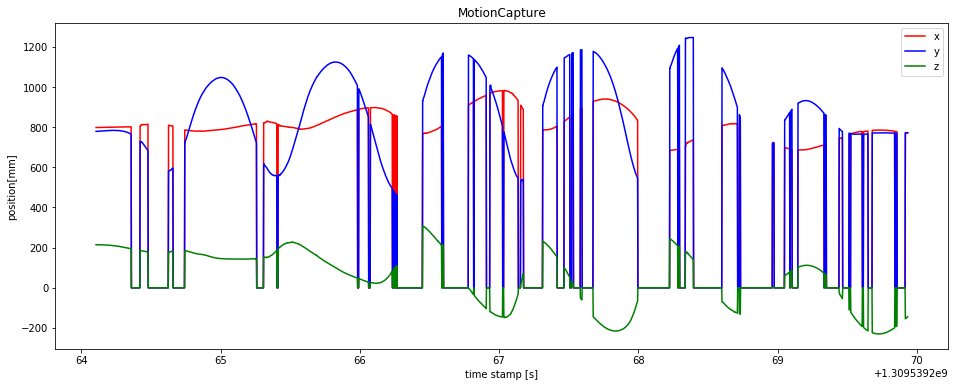

In [7]:
#mocapグラフの生成する(brfore fix)
mcx = mc_lw[['TimeStamp']]
mcy1 = mc_lw[['m16x']]
mcy2 = mc_lw[['m16y']]
mcy3 = mc_lw[['m16z']]

#mcy1 = mc_lw[['m30x']]
#mcy2 = mc_lw[['m30y']]
#mcy3 = mc_lw[['m30z']]

rcParams['figure.figsize'] = 16,6
plt.plot(mcx,mcy1,label = "x",color="red")
plt.plot(mcx,mcy2,label = "y",color="blue")
plt.plot(mcx,mcy3,label = "z",color="green")
plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("position[mm]")
plt.title('MotionCapture')

In [8]:
#0値を補正(median ver)
#for  c  in  ['m17x','m17y','m17z']:
   # col = mc_lw[c]  #'m17x'列から1列ずつ見る
   # for r in range(3,len(data_mocap)):  #1行ずつ見る
      #  if col[r] == 0.0:       #0値が見つかれば...
        #    mc_lw.iloc[r][c] = median([col[r-1],col[r-2],col[r-3]])           #前3つの中間値を代入
#mc_lw_clean = mc_lw

In [9]:
#0値を補正(0.0 skip ver)
#for  c  in  ['m17x','m17y','m17z']:
   # col = mc_lw[c]  #'m17x'列から1列ずつ見る
    #for r in range(len(data_mocap)):  #1行ずつ見る
      #  if col[r] == 0.0:       #0値が見つかれば
        #    mc_lw.iloc[r][c] = 'NaN' #'NaN'を代入
#mc_lw_clean = mc_lw.dropna(axis = 0, how = 'any')  #'NaNを含む行を全て削除

In [10]:
#fix NaN
for  c  in  ['m16x','m16y','m16z']:
#for  c  in  ['m30x','m30y','m30z']:
    col = mc_lw[c]  #'X'列から1列ずつ見る
    for r in range(len(mc_lw)):  #1行ずつ見る
        if col[r] == 0.0:       #0値が見つかれば
            mc_lw.iloc[r][c] = 'NaN' #'NaN'を代入
mc_lw_clean = mc_lw.interpolate()
#mc_lw_clean = mc_lw.fillna(0)

In [11]:
mc_lw_clean.head()

,m16x,m16y,m16z,TimeStamp
0,798.197815,778.936157,214.335144,1.309539e+09
1,798.222839,778.997620,214.349640,1.309539e+09
2,798.241089,779.158020,214.402817,1.309539e+09
3,798.249939,779.197998,214.397186,1.309539e+09
4,798.375610,779.458313,214.421616,1.309539e+09


In [12]:
#mc_lw_clean.shape #2799行4列
#mc_lw_clean.describe()

Text(0.5,1,'MotionCapture(after fix)')

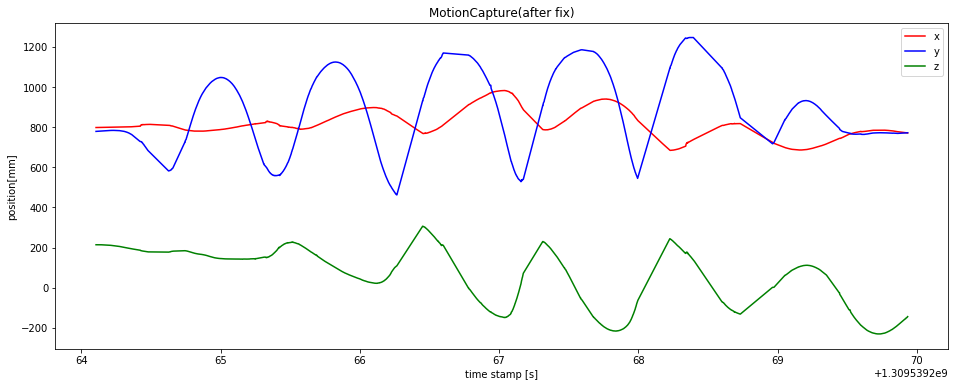

In [13]:
#mocapグラフの生成する(after fix)
mcx = mc_lw_clean[['TimeStamp']]
mcy1 = mc_lw_clean[['m16x']]
mcy2 = mc_lw_clean[['m16y']]
mcy3 = mc_lw_clean[['m16z']]
#mcy1 = mc_lw_clean[['m30x']]
#mcy2 = mc_lw_clean[['m30y']]
#mcy3 = mc_lw_clean[['m30z']]

rcParams['figure.figsize'] = 16,6
plt.plot(mcx,mcy1,label = "x",color="red")
plt.plot(mcx,mcy2,label = "y",color="blue")
plt.plot(mcx,mcy3,label = "z",color="green")
plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("position[mm]")
plt.title('MotionCapture(after fix)')

In [14]:
print(len(mc_lw_clean))
#print(480//30)
#print(len(mc_lw_clean)//16)
#print(len(mc_lw_clean)%16)

2799


In [15]:
mc_lw_clean.shape

(2799, 4)

In [16]:
#dawn sampling (avg)
#初期値を設定
i = 0
mc_lw_ds = pd.DataFrame()
#処理
while  i < (len(mc_lw_clean)//12)*12:
    mc_lw_ds= mc_lw_ds.append(mc_lw_clean.iloc[i+6,0:4],ignore_index=True)
    i+=12
    
mc_lw_ds= mc_lw_ds.append(mc_lw_clean.iloc[i:,0:4].median(),ignore_index=True)
mc_lw_ds.head()

,TimeStamp,m16x,m16y,m16z
0,1.309539e+09,798.374878,779.600281,214.409561
1,1.309539e+09,798.472168,780.506226,214.144196
2,1.309539e+09,798.951660,781.888672,213.517776
3,1.309539e+09,799.274841,783.001465,212.490158
4,1.309539e+09,799.553772,783.736816,210.927185


In [17]:
mc_lw_ds.shape

(234, 4)

In [18]:
#dawn sampling (mediam)
#初期値を設定
#i = 0
#mc_lw_ds = pd.DataFrame()
#処理
#while  i < (len(mc_lw_clean)//16)*16:
   # mc_lw_ds= mc_lw_ds.append(mc_lw_clean.iloc[i : i+16,0:4].median(),ignore_index=True)
    #i+=16
    
#mc_lw_ds= mc_lw_ds.append(mc_lw_clean.iloc[i : i+15,0:4].median(),ignore_index=True)

#mc_lw_ds

Text(0.5,1,'MotionCapture[after dawn sampling]')

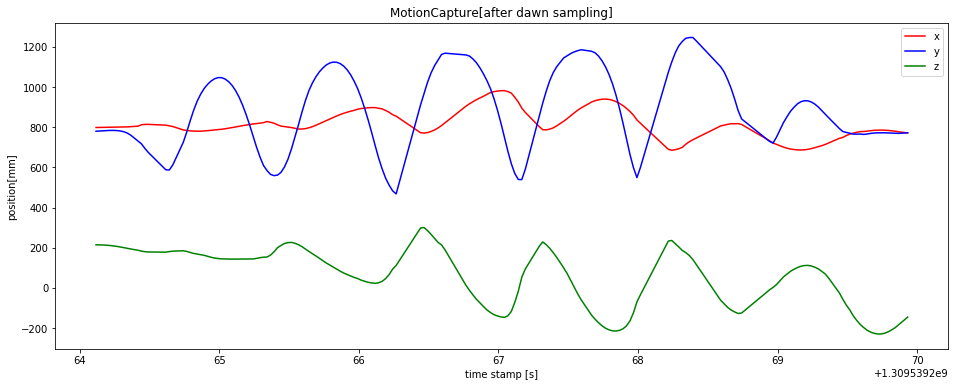

In [19]:
#mocapグラフの生成する(after dawn sampling)
mcx = mc_lw_ds[['TimeStamp']]
mcy1 = mc_lw_ds[['m16x']]
mcy2 = mc_lw_ds[['m16y']]
mcy3 = mc_lw_ds[['m16z']]
#mcy1 = mc_lw_ds[['m30x']]
#mcy2 = mc_lw_ds[['m30y']]
#mcy3 = mc_lw_ds[['m30z']]

rcParams['figure.figsize'] = 16,6
plt.plot(mcx,mcy1,label = "x",color="red")
plt.plot(mcx,mcy2,label = "y",color="blue")
plt.plot(mcx,mcy3,label = "z",color="green")
plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("position[mm]")
plt.title('MotionCapture[after dawn sampling]')

In [20]:
#時間差を求める
#time_diffs = []
#for i in range(len(mc_lw_ds)-1):
   # time_diff =  mc_lw_ds.iloc[i+1]['TimeStamp'] - mc_lw_ds.iloc[i]['TimeStamp']
    #time_diffs.append(time_diff)



#座標差を求める関数を定義
#def pos_diff(col):
   # diffs = []
    #for i in range(len(mc_lw_ds)-1):
      #  diff = mc_lw_ds.iloc[i+1][col]-mc_lw_ds.iloc[i][col]
        #diffs.append(diff)
    #return diffs

#x座標値差[mm/s]
#x_diffs =pos_diff('m16x')
#y座標値差[mm/s]
#y_diffs =pos_diff('m16y')
#z座標値差[mm/s]
#z_diffs =pos_diff('m16z')

#速度計算をする関数 velocity
#def cal_v(pos_diff): 
   # vs = []
    #for i in range(len(time_diffs)):
      #  v = pos_diff[i]/time_diffs[i]
        #vs.append(v)
    #return vs


#速度計算 
#x
#x_v = cal_v(x_diffs)
#y
#y_v = cal_v(y_diffs)
#z
#z_v = cal_v(z_diffs)
#mc_lw_v= pd.DataFrame({"xv":x_v,"yv":y_v,"zv":z_v,"TimeStamp":mc_lw_ds['TimeStamp'][1:]})

In [21]:
def cal_va(data):
    diffs = pd.DataFrame()
    for i in range(len(data)-1):
        diff = data.iloc[i+1]-data.iloc[i]
        diffs = diffs.append(diff,ignore_index=True)
        
    vs = pd.DataFrame()
    for i in range(len(diffs)):
        v = diffs.iloc[i][1:]/diffs.iloc[i]["TimeStamp"]
        vs = vs.append(v,ignore_index=True)
    return vs

In [22]:
print(mc_lw_ds.shape)
print(cal_va(mc_lw_ds).shape)
print(mc_lw_ds.head())
print(cal_va(mc_lw_ds).head())


(234, 4)
(233, 3)
      TimeStamp        m16x        m16y        m16z
0  1.309539e+09  798.374878  779.600281  214.409561
1  1.309539e+09  798.472168  780.506226  214.144196
2  1.309539e+09  798.951660  781.888672  213.517776
3  1.309539e+09  799.274841  783.001465  212.490158
4  1.309539e+09  799.553772  783.736816  210.927185
        m16x       m16y       m16z
0   3.891734  36.239044 -10.614964
1  19.182168  55.305013 -25.060050
2  12.928177  44.514946 -41.107699
3  11.157729  29.415330 -62.521663
4  10.847946   2.873768 -80.191372


In [23]:
#(mc_lw_ds.iloc[1][ "m16y" ]-mc_lw_ds.iloc[0]["m16y"])/(mc_lw_ds.iloc[1][ "TimeStamp"]-mc_lw_ds.iloc[0][ "TimeStamp"])

In [24]:
#x座標 v[mm/s]
x_v = cal_va(mc_lw_ds).iloc[:,0]
#y座標 v[mm/s]
y_v = cal_va(mc_lw_ds).iloc[:,1]
#z座標 v[mm/s]
z_v = cal_va(mc_lw_ds).iloc[:,2]

#x座標 v[mm/s]
#x_v = cal_va(mc_lw).iloc[:,0]
#y座標 v[mm/s]
#y_v = cal_va(mc_lw).iloc[:,1]
#z座標 v[mm/s]
#z_v = cal_va(mc_lw).iloc[:,2]

In [25]:
print(mc_lw_ds['TimeStamp'].shift(periods=-1)[0])
print(mc_lw_ds['TimeStamp'].shift(periods=-1)[1])
print("~~~~~~~~")
print(mc_lw_ds['TimeStamp'][0])
print(mc_lw_ds['TimeStamp'][1])
print(mc_lw_ds['TimeStamp'][2])

1309539264.1431131
1309539264.16811
~~~~~~~~
1309539264.118114
1309539264.1431131
1309539264.16811


In [26]:
times = mc_lw_ds['TimeStamp'].shift(periods=-1)
#times = mc_lw['TimeStamp'].shift(periods=-1)

mc_lw_v = pd.DataFrame({"xv":x_v,"yv":y_v,"zv":z_v,"TimeStamp":times})
mc_lw_v = mc_lw_v.dropna()
mc_lw_v.tail()
#times.head()
#print(mc_lw_v.shape)

,xv,yv,zv,TimeStamp
228,-86.039753,-7.405391,443.813384,1.309539e+09
229,-113.726841,-25.218509,571.091388,1.309539e+09
230,-80.467133,44.839787,590.086948,1.309539e+09
231,-80.870048,45.064308,593.041632,1.309539e+09
232,-108.883125,32.453608,580.261370,1.309539e+09


In [27]:
#mc_v_x = mc_lw_v[['TimeStamp']]
#mc_v_y1 = mc_lw_v[['xv']]
#mc_v_y2 = mc_lw_v[['yv']]
#mc_v_y3 = mc_lw_v[['zv']]

#rcParams['figure.figsize'] = 16,10
#plt.plot(mc_v_x,mc_v_y1,label = "x",color="red")
#plt.plot(mc_v_x,mc_v_y2,label = "y",color="blue")
#plt.plot(mc_v_x,mc_v_y3,label = "z",color="green")
#plt.legend()

#plt.xlabel("time stamp [s]")
#plt.ylabel("velocity [mm/s]")
#plt.plot()

In [28]:
#時間差を求める
#time_diffs2 = []
#for i in range(len(mc_lw_v)-1):
   # time_diff =  mc_lw_v.iloc[i+1]['TimeStamp'] - mc_lw_v.iloc[i]['TimeStamp']
    #time_diffs2.append(time_diff)
#len(time_diffs2)

In [29]:
#速度差を求める関数を定義
#def v_diff(col):
   # diffs = []
    #for i in range(len(mc_lw_v)-1):
      #  diff = mc_lw_v.iloc[i+1][col]-mc_lw_v.iloc[i][col]
        #diffs.append(diff)
    #return diffs

In [30]:
#x座標値差[mm/s]
#xv_diffs =v_diff('xv')
#y座標値差[mm/s]
#yv_diffs =v_diff('yv')
#z座標値差[mm/s]
#zv_diffs =v_diff('zv')

In [31]:
#print(len(xv_diffs),',',len(yv_diffs),',',len(zv_diffs))

In [32]:
#加速度計算をする関数 velocity
#def cal_a(v_diff): 
   # vs = []
    #for i in range(len(time_diffs2)):
      #  v = v_diff[i]/time_diffs2[i]
        #vs.append(v)
    #return vs

In [33]:
#加速度計算 acceleration
#x
#x_a = cal_a(xv_diffs)
#y
#y_a = cal_a(yv_diffs)
#z
#z_a = cal_a(zv_diffs)
#mc_lw_a = pd.DataFrame({"xa":x_a,"ya":y_a,"za":z_a,"TimeStamp":mc_lw_v['TimeStamp'][1:]})

In [ ]:
#加速度計算 acceleration
#x
x_a = cal_va(mc_lw_v).iloc[:,0]
#y
y_a = cal_va(mc_lw_v).iloc[:,1]
#z
z_a = cal_va(mc_lw_v).iloc[:,2]

In [ ]:
cal_va(mc_lw_v).head()

In [ ]:
times = mc_lw_v['TimeStamp'].shift(periods=-1)
mc_lw_a = pd.DataFrame({"xa":x_a,"ya":y_a,"za":z_a,"TimeStamp":times})
mc_lw_a = mc_lw_a.dropna()
mc_lw_a.head()

In [ ]:
mc_lw_a.shape
#print(mc_lw_v['TimeStamp'].shift(periods=-1)[0])
#print(mc_lw_v['TimeStamp'].shift(periods=-1)[1])
#print("~~~~~~~~")
#print(mc_lw_v['TimeStamp'][0])
#print(mc_lw_v['TimeStamp'][1])
#print(mc_lw_v['TimeStamp'][2])

In [ ]:
#print(mc_lw_a.iloc[0][ "TimeStamp"])

In [ ]:
#(mc_lw_v.iloc[1][ "xv" ]-mc_lw_v.iloc[0]["xv"])/(mc_lw_v.iloc[1][ "TimeStamp"]-mc_lw_v.iloc[0][ "TimeStamp"])

In [ ]:
#print(mc_lw_a.iloc[0][ "xa"]*0.001/9.80665)

In [ ]:
def lim2g(data):
    for  c  in  data.columns:
        if c != "TimeStamp":
            col = data[c]  #1列ずつ見る
            for r in range(len(data)):  #1行ずつ見る
                if col[r] > 2.0:       #2.0より大きい値が見つかれば
                    data.iloc[r][c] = 2.0 #2.0を代入
                elif col[r] < -2.0:       #-2.0より小さい値が見つかれば
                    data.iloc[r][c] = -2.0 #-2.0を代入
    return data

In [ ]:
#単位を[G]に変換  [mm/s^2] →  [G]
accel = mc_lw_a[['xa','ya','za']]*0.001/9.80665
accel = pd.concat([accel,mc_lw_a["TimeStamp"]], axis=1)
#accel = accel.rolling(window= 10, center=False).median()
#accel = accel.dropna()
v_accel = np.clip(accel.loc[:,accel.columns != "TimeStamp"], -2.0, 2.0)
#accel = lim2g(accel)
v_accel = pd.concat([v_accel,accel["TimeStamp"]],axis=1)
#accel = accel.reset_index(drop=True)
v_accel

In [ ]:
#accel.shape

In [ ]:
mc_a_x = v_accel[['TimeStamp']]
mc_a_y1 = v_accel[['xa']]
mc_a_y2 = v_accel[['ya']]
mc_a_y3 = v_accel[['za']]

rcParams['figure.figsize'] = 10,6
plt.plot(mc_a_x[:],mc_a_y1[:],label = "x",color = "red")
plt.plot(mc_a_x[:],mc_a_y2[:],label="y",color = "blue")
plt.plot(mc_a_x[:],mc_a_y3[:],label="z",color = 'green')
plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("Acceleromerter X,Y,Z [G]")
plt.title("Accelerometer(after)")

In [ ]:
mc_a_x = v_accel[['TimeStamp']]
mc_a_y1 = v_accel[['xa']]
mc_a_y2 = v_accel[['ya']]
mc_a_y3 = v_accel[['za']]

rcParams['figure.figsize'] = 10,6
plt.plot(mc_a_x[:],mc_a_y1[:],label = "x")
#plt.plot(acx[:],acy1[:],label="Accelerometer",color="red")
plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("accel [G]")
plt.title("Acceleration   X")
plt.plot()

In [ ]:
rcParams['figure.figsize'] = 10,6
plt.plot(mc_a_x[10:],mc_a_y2[10:],label = "Motion Capture",color="blue")
plt.plot(acx[10:],acy2[10:],label="Accelerometer",color="red")
plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("accel [G]")
plt.title("Acceleration     Y ")
plt.plot()

In [ ]:
rcParams['figure.figsize'] = 10,6
plt.plot(mc_a_x[5:],mc_a_y3[5:],label = "Motion Capture",color="green")
plt.plot(acx[5:],acy3[5:],label="Accelerometer",color="red")
plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("accel [G]")
plt.title("Acceleration     Z ")
plt.plot()

In [ ]:
virtual_acc = one_acc(v_accel)
len(v_accel)

In [ ]:
len(real_acc)

In [ ]:
#加速度グラフ生成
acxv = virtual_acc[['TimeStamp']]

acyv = virtual_acc[['acc']]

rcParams['figure.figsize'] = 18,9
#plt.plot(acx,acy,label="real",color = "red")
plt.scatter(acx,acy,label="real",color = "red")
#plt.plot(acxv,acyv,label="virtual",color = "blue")
plt.scatter(acxv,acyv,label="virtual",color = "blue")


plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("Acceleromerter X,Y,Z [G]")
plt.title("Accelerometer")

In [ ]:
def cross_correlation_fft(a, b, mode='valid'):
    """Cross correlation between two 1D signals. Similar to np.correlate, but
    faster.
 
    Parameters
    ----------
    a : np.array, shape(n)
    b : np.array, shape(m)
        If len(b) > len(a), a, b = b, a
 
    Output
    ------
    r : np.array
        Correlation coefficients. Shape depends on mode.
    """
    from scipy import signal
    a = np.asarray(a)
    b = np.asarray(b)
    if np.prod(a.ndim) > 1 or np.prod(b.ndim) > 1:
        raise ValueError('Can only vectorize vectors')
    if len(b) > len(a):
        a, b = b, a
    n = len(a)
    # Pad vector
    c = np.hstack((np.zeros(int(n/2)), b, np.zeros(int(n/2) + len(a) - len(b) + 1)))
    # Convolution of reverse signal:
    return signal.fftconvolve(c, a[::-1], mode=mode)

In [ ]:
def align_signals(a, b):
    """Finds optimal delay to align two 1D signals
    maximizes hstack((zeros(shift), b)) = a
 
    Parameters
    ----------
    a : np.array, shape(n)
    b : np.array, shape(m)
 
    Output
    ------
    shift : int
        Integer that maximizes hstack((zeros(shift), b)) - a = 0
    """
    # check inputs
    a = np.asarray(a)
    b = np.asarray(b)
    if np.prod(a.ndim) > 1 or np.prod(b.ndim) > 1:
        raise ValueError('Can only vectorize vectors')
    # longest first
    sign = 1
    if len(b) > len(a):
        sign = -1
        a, b = b, a
    r = cross_correlation_fft(a, b)
    shift = np.argmax(r) - len(a) + len(a) / 2
    # deal with odd / even lengths (b doubles in size by cross_correlation_fft)
    if len(a) % 2 and len(b) % 2:
        shift += 1
    if len(a) > len(b) and len(a) % 2 and not(len(b) % 2):
        shift += 1
    return sign * shift

In [ ]:
align_signals( v_accel['xa'],linear_acc['X'])

In [ ]:
align_signals( v_accel['ya'],linear_acc['Y'])
#align_signals( linear_acc['X'],v_accel['xa'])

In [ ]:
align_signals( v_accel['za'],linear_acc['Z'])

In [ ]:
#new_mcax = np.hstack((np.zeros(-16), mc_a_y1))
#new_mcay = np.hstack((np.zeros(-3), mc_a_y1))
#new_mcaz = np.hstack((np.zeros(-3), mc_a_y1))

new_linear_accx = np.hstack((np.zeros(16), linear_acc['X']))
new_linear_accy = np.hstack((np.zeros(3), linear_acc['Y']))
new_linear_accz = np.hstack((np.zeros(3), linear_acc['Z']))

In [ ]:
print(len(linear_acc['X']))
print(len(mc_a_x))
print(len(acx))
print(len(new_linear_accx))

In [ ]:
rcParams['figure.figsize'] = 10,6
plt.plot(mc_a_x,mc_a_y1,label = "x")
plt.plot(acx,new_linear_accx[:-16:1],label="Accelerometer",color="red")
plt.scatter(mc_a_x,mc_a_y1,label = "x")
plt.scatter(acx,new_linear_accx[:-16:1],label="Accelerometer",color="red")

plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("accel [G]")
def highres(y,kind='cubic',res=100):
    # interpolate onto higher resolution grid with res* more data points than original input
    # from scipy import interpolate
    y = np.array(y)
    x = np.arange(0, y.shape[0])
    f = interp1d(x, y,kind='cubic')
    xnew = np.linspace(0, x.shape[0]-1, x.shape[0]*res)
    ynew = f(xnew)
    return xnew,ynewplt.title("Acceleration   X")
plt.plot()
print(len(mc_a_y1))
print(len(new_linear_accx[0:-16:1]))

In [ ]:
rcParams['figure.figsize'] = 10,6
plt.plot(mc_a_x,mc_a_y2,label = "y")
plt.plot(acx,new_linear_accy[:-3:1],label="Accelerometer",color="red")
plt.scatter(mc_a_x,mc_a_y2,label = "y")
plt.scatter(acx,new_linear_accy[:-3:1],label="Accelerometer",color="red")

plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("accel [G]")
def highres(y,kind='cubic',res=100):
    # interpolate onto higher resolution grid with res* more data points than original input
    # from scipy import interpolate
    y = np.array(y)
    x = np.arange(0, y.shape[0])
    f = interp1d(x, y,kind='cubic')
    xnew = np.linspace(0, x.shape[0]-1, x.shape[0]*res)
    ynew = f(xnew)
    return xnew,ynewplt.title("Acceleration   Y")
plt.plot()

In [ ]:
rcParams['figure.figsize'] = 10,6
plt.plot(mc_a_x,mc_a_y3,label = "z")
plt.plot(acx,new_linear_accz[0:-3:1],label="Accelerometer",color="red")
plt.scatter(mc_a_x,mc_a_y3,label = "z")
plt.scatter(acx,new_linear_accz[0:-3:1],label="Accelerometer",color="red")

plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("accel [G]")
def highres(y,kind='cubic',res=100):
    # interpolate onto higher resolution grid with res* more data points than original input
    # from scipy import interpolate
    y = np.array(y)
    x = np.arange(0, y.shape[0])
    f = interp1d(x, y,kind='cubic')
    xnew = np.linspace(0, x.shape[0]-1, x.shape[0]*res)
    ynew = f(xnew)
    return xnew,ynewplt.title("Acceleration   Z")
plt.plot()

In [ ]:
y1 = mc_a_y1[16:110]
y1 = y1.reset_index(drop=True)
np.array(y1)
y1 = list(np.ravel(y1))
x1 = new_linear_accx[:-16:1][16:110].tolist()

y2 = mc_a_y2[10:110]
np.array(y2)
y2 = list(np.ravel(y2))
x2 = new_linear_accy[:-3:1][10:110].tolist()

y3 = mc_a_y3[10:110]
np.array(y3)
y3 = list(np.ravel(y3))
x3 = new_linear_accz[:-3:1][10:110].tolist()

In [ ]:
print(len(x1))
print(len(y1))


In [ ]:
#len(new_linear_accx[16::1][16:])
print(np.corrcoef(x1, y1)[0, 1])
print(np.corrcoef(x2, y2)[0, 1])
print(np.corrcoef(x3, y3)[0, 1])

In [ ]:
plt.scatter(x1, y1)
#　フィッティング
a, b = np.polyfit(x1, y1, 1)
# フィッティング直線
fh = a * x1 + b
plt.plot(x1, fh, label="fh")
print(a)


In [ ]:
plt.scatter(x2, y2)
#　フィッティング
a, b = np.polyfit(x2, y2, 1)
# フィッティング直線
fh = a * x2 + b
plt.plot(x2, fh, label="fh")
print(a)

In [ ]:
plt.scatter(x3, y3)
#　フィッティング
a, b = np.polyfit(x3, y3, 1)
# フィッティング直線
fh = a * x3 + b
plt.plot(x3, fh, label="fh")
print(a)

In [ ]:
from scipy.interpolate import interp1d
from statsmodels.tsa.stattools import ccovf, ccf

def highres(y,kind='cubic',res=100):
    # interpolate onto higher resolution grid with res* more data points than original input
    # from scipy import interpolate
    y = np.array(y)
    x = np.arange(0, y.shape[0])
    f = interp1d(x, y,kind='cubic')
    xnew = np.linspace(0, x.shape[0]-1, x.shape[0]*res)
    ynew = f(xnew)
    return xnew,ynew

def phase_spectra(ref,tar,ROI,res=100):
    '''
        Cross-Correlate data within ROI with a precision of 1./res
        interpolate data onto higher resolution grid and
        align target to reference
    '''
    x,r1 = highres(ref[ROI[0]:ROI[1]],kind='linear',res=res)
    x,r2 = highres(tar[ROI[0]:ROI[1]],kind='linear',res=res)

    r1 -= r1.mean()
    r2 -= r2.mean()

    cc = ccovf(r1,r2,demean=False,unbiased=False)
    if np.argmax(cc) == 0:
        cc = ccovf(r2,r1,demean=False,unbiased=False)
        mod = -1
    else:
        mod = 1

    s1 = np.argmax(cc)*mod*(1./res)
    return s1

    # older method that behaves the same just uses more lines of code
    x,r1 = highres(ref[ROI[0]:ROI[1]],kind='linear',res=res)
    x,r2 = highres(tar[ROI[0]:ROI[1]],kind='linear',res=res)

    r1 -= r1.mean()
    r1 -= r2.mean()

    # compute the POC function
    product = np.fft.fft(r1) * np.fft.fft(r2).conj()
    cc = np.fft.fftshift(np.fft.ifft(product))

    l = ref[ROI[0]:ROI[1]].shape[0]
    shifts = np.linspace(-0.5*l,0.5*l,l*res)

    return shifts[np.argmax(cc.real)]

In [ ]:
 s = phase_spectra(v_accel['ya'],linear_acc['Y'], [0,100])

In [ ]:
s

# other action

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import median,mean
%matplotlib inline
from pylab import rcParams
import sympy as sym
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from scipy import stats as s
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import sklearn.cross_validation as crv
from sklearn.metrics import accuracy_score
def obtain_statistical_feature(window):
    #features = np.array(np.array(np.var(window, axis=0)))
    #features=np.array(np.array(np.mean(window-np.mean(window), axis=0)))
    features=np.array( np.array(np.mean(window-np.median(window), axis=0))) 
    features=np.append(features, np.array(np.std(window, axis=0))) 
    features=np.append(features, np.array(np.var(window, axis=0)))
    features=np.append(features, np.array(s.skew(window, axis=0)))
    features=np.append(features, np.array(s.kurtosis(window, axis=0)))
    features=np.append(features, np.array(get_tw_variance(window)))
    return features.reshape(1,len(features))

def get_tw_variance(window):
    total_cols = window.shape[1]
    tw_var = []
    for i in range (total_cols):
        column = window.iloc[:,i]
        tw_var.append(get_tw_col_var(column))
    return tw_var


def get_tw_col_var(column):
    mean = np.mean(column)
    total = len(column)
    
    v_sum = 0
    for i in range(total):
        w = np.exp(-0.5*(total-i))
        #print("el peso", w, "indice", i, "total", total)
        v = w*np.square(column.iloc[i]-mean)
        v_sum += v
    return v_sum

# Acceleromater

In [ ]:
acc_lw = pd.read_csv("/Users/takeshin/ws/BerkeleyMHAD/Accelerometer/Shimmer01/acc_h01_s01_a11_r01.txt",sep=' ' ,header=None,names=['X','Y','Z','TimeStamp'])
acc_lw.head()

In [ ]:
#加速度グラフ生成
acx = acc_lw[['TimeStamp']]

acy1 = acc_lw['X']
acy2 = acc_lw['Y']
acy3 = acc_lw['Z']

rcParams['figure.figsize'] = 18,9
plt.plot(acx,acy1,label = "x",color = "red")
plt.plot(acx,acy2,label="y",color = "blue")
plt.plot(acx,acy3,label="z",color = 'green')
plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("Acceleromerter X,Y,Z [G]")
plt.title("Accelerometer")

In [ ]:
#low-pass filter linear acceleration
#線形加速度を得る
alpha = 0.9
for  c  in  ['X','Y','Z']:
    g = 0  
    col = acc_lw[c]           #'X'列から1列ずつ見る
    for r in range(len(acc_lw)):         #1行ずつ見る
        g = alpha*g + (1-alpha) * col[r]
        linear = col[r] - g
        acc_lw.iloc[r][c] = linear
    
linear_acc = acc_lw

In [ ]:
#加速度グラフ生成(線形加速)
acx = linear_acc[['TimeStamp']]

acy1 = linear_acc['X']
acy2 = linear_acc['Y']
acy3 = linear_acc['Z']

rcParams['figure.figsize'] = 18,9
plt.plot(acx,acy1,label = "x",color = "red")
plt.plot(acx,acy2,label="y",color = "blue")
plt.plot(acx,acy3,label="z",color = 'green')
plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("Acceleromerter X,Y,Z [G]")
plt.title("Accelerometer(after)")

In [ ]:
#合成加速度を求める
def one_acc(data):
    xyz = pd.DataFrame(columns=["acc"])
    accs = []
    for i in range(len(data)):
        #ベクトルの大きさを求める
        acc = np.linalg.norm(data.loc[i][data.columns != "TimeStamp"])
        accs.append(acc)
    xyz["acc"]= accs
    xyz["TimeStamp"] = data["TimeStamp"].tolist()
    return xyz

real_acc = one_acc(linear_acc)

#加速度グラフ生成
acx = real_acc[['TimeStamp']]

acy = real_acc[['acc']]

rcParams['figure.figsize'] = 18,9
plt.plot(acx,acy,label="real",color = "red")
plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("Acceleromerter X,Y,Z [G]")
plt.title("Accelerometer")

# Mocap

In [ ]:
#モーションキャプチャデータの読み込み(全身)
data_mocap = pd.read_csv("/Users/takeshin/ws/BerkeleyMHAD/Mocap/OpticalData/moc_s01_a01_r01.txt",sep=' ',header=None)

In [ ]:
#座標値列の列名作成する
p0 = ['x','y','z']
marker =[]
p2 =[]
for a in range(1,44):       #Mocapマーカー数:43個
    p1='m'+ str(a)
    for b in p0:
        p2 = p1 + b
        marker.append(p2)
    
#marker

In [ ]:
#座標値列の列名変更
data_mocap=data_mocap.rename(columns={data_mocap.columns[a]:marker[a] for a in range(129)} )
#座標値列以外の列名変更
data_mocap=data_mocap.rename(columns={129:'FrameNumber',130:'TimeStamp'})
#data_mocap.head()

In [ ]:
mc_lw = data_mocap[['m16x','m16y','m16z','TimeStamp']]
#mc_lw = data_mocap[['m30x','m30y','m30z','TimeStamp']]
mc_lw.head()

In [ ]:
#mocapグラフの生成する(brfore fix)
mcx = mc_lw[['TimeStamp']]
mcy1 = mc_lw[['m16x']]
mcy2 = mc_lw[['m16y']]
mcy3 = mc_lw[['m16z']]
#mcy1 = mc_lw[['m30x']]
#mcy2 = mc_lw[['m30y']]
#mcy3 = mc_lw[['m30z']]



rcParams['figure.figsize'] = 16,6
plt.plot(mcx,mcy1,label = "x",color="red")
plt.plot(mcx,mcy2,label = "y",color="blue")
plt.plot(mcx,mcy3,label = "z",color="green")
plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("position[mm]")
plt.title('MotionCapture')

In [ ]:
#fix NaN
for  c  in  ['m16x','m16y','m16z']:
#for  c  in  ['m30x','m30y','m30z']:    
    col = mc_lw[c]  #'X'列から1列ずつ見る
    for r in range(len(mc_lw)):  #1行ずつ見る
        if col[r] == 0.0:       #0値が見つかれば
            mc_lw.iloc[r][c] = 'NaN' #'NaN'を代入
mc_lw_clean = mc_lw.interpolate()
#mc_lw_clean = mc_lw_clean.fillna(method="bfill")

In [ ]:
print(len(mc_lw_clean)//16)
print(len(mc_lw_clean)%16)
print(len(mc_lw_clean))
print(len(linear_acc))
print(len(mc_lw_clean)/len(linear_acc))

In [ ]:
#mocapグラフの生成する(after fix)
mcx = mc_lw_clean[['TimeStamp']]
mcy1 = mc_lw_clean[['m16x']]
mcy2 = mc_lw_clean[['m16y']]
mcy3 = mc_lw_clean[['m16z']]
#mcy1 = mc_lw_clean[['m30x']]
#mcy2 = mc_lw_clean[['m30y']]
#mcy3 = mc_lw_clean[['m30z']]


rcParams['figure.figsize'] = 16,6
plt.plot(mcx,mcy1,label = "x",color="red")
plt.plot(mcx,mcy2,label = "y",color="blue")
plt.plot(mcx,mcy3,label = "z",color="green")
plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("position[mm]")
plt.title('MotionCapture(after fix)')

In [ ]:
#dawn sampling (avg)
#初期値を設定
i = 0
mc_lw_ds = pd.DataFrame()
#処理
while  i < (len(mc_lw_clean)//15)*15:
    mc_lw_ds= mc_lw_ds.append(mc_lw_clean.iloc[i+7,0:4],ignore_index=True)
    i+=15
if i < len(mc_lw_clean):
    mc_lw_ds= mc_lw_ds.append(mc_lw_clean.iloc[i:,0:4].median(),ignore_index=True)

mc_lw_ds.head()

In [ ]:
mc_lw_ds.shape

In [ ]:
#mocapグラフの生成する(after dawn sampling)
mcx = mc_lw_ds[['TimeStamp']]
mcy1 = mc_lw_ds[['m16x']]
mcy2 = mc_lw_ds[['m16y']]
mcy3 = mc_lw_ds[['m16z']]
#mcy1 = mc_lw_ds[['m30x']]
#mcy2 = mc_lw_ds[['m30y']]
#mcy3 = mc_lw_ds[['m30z']]


rcParams['figure.figsize'] = 16,6
plt.plot(mcx,mcy1,label = "x",color="red")
plt.plot(mcx,mcy2,label = "y",color="blue")
plt.plot(mcx,mcy3,label = "z",color="green")
plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("position[mm]")
plt.title('MotionCapture[after dawn sampling]')

In [ ]:
def cal_va(data):
    diffs = pd.DataFrame()
    for i in range(len(data)-1):
        diff = data.iloc[i+1]-data.iloc[i]
        diffs = diffs.append(diff,ignore_index=True)
        
    vs = pd.DataFrame()
    for i in range(len(diffs)):
        v = diffs.iloc[i][1:]/diffs.iloc[i]["TimeStamp"]
        vs = vs.append(v,ignore_index=True)
    return vs

In [ ]:
print(mc_lw_ds.shape)
print(cal_va(mc_lw_ds).shape)
print(mc_lw_ds.head())
#print(cal_va(mc_lw_ds).head())
cal_va(mc_lw_ds).columns

In [ ]:
#(mc_lw_ds.iloc[1][ "m16y" ]-mc_lw_ds.iloc[0]["m16y"])/(mc_lw_ds.iloc[1][ "TimeStamp"]-mc_lw_ds.iloc[0][ "TimeStamp"])

In [ ]:
#x座標 v[mm/s]
x_v = cal_va(mc_lw_ds).iloc[:,0]
#y座標 v[mm/s]
y_v = cal_va(mc_lw_ds).iloc[:,1]
#z座標 v[mm/s]
z_v = cal_va(mc_lw_ds).iloc[:,2]

In [ ]:
times = mc_lw_ds['TimeStamp'].shift(periods=-1)
mc_lw_v = pd.DataFrame({"xv":x_v,"yv":y_v,"zv":z_v,"TimeStamp":times})
mc_lw_v = mc_lw_v.dropna()
#mc_lw_v.tail()
#times.head()
#print(mc_lw_v.shape)

In [ ]:
#加速度計算 acceleration
#x
x_a = cal_va(mc_lw_v).iloc[:,0]
#y
y_a = cal_va(mc_lw_v).iloc[:,1]
#z
z_a = cal_va(mc_lw_v).iloc[:,2]

In [ ]:
cal_va(mc_lw_v).head()

In [ ]:
times = mc_lw_v['TimeStamp'].shift(periods=-1)
mc_lw_a = pd.DataFrame({"xa":x_a,"ya":y_a,"za":z_a,"TimeStamp":times})
mc_lw_a = mc_lw_a.dropna()
mc_lw_a.head()

In [ ]:
def lim2g(data):
    for  c  in  data.columns:
        if c != "TimeStamp":
            col = data[c]  #1列ずつ見る
            for r in range(len(data)):  #1行ずつ見る
                if col[r] > 2.0:       #2.0より大きい値が見つかれば
                    data.iloc[r][c] = 2.0 #2.0を代入
                elif col[r] < -2.0:       #-2.0より小さい値が見つかれば
                    data.iloc[r][c] = -2.0 #-2.0を代入
    return data

In [ ]:
#単位を[G]に変換  [mm/s^2] →  [G]
accel = mc_lw_a[['xa','ya','za']]*0.001/9.80665
accel = pd.concat([accel,mc_lw_a["TimeStamp"]], axis=1)
#accel = accel.rolling(window= 10, center=False).median()
#accel = accel.dropna()
v_accel = np.clip(accel.loc[:,accel.columns != "TimeStamp"], -2.0, 2.0)
#accel = lim2g(accel)
v_accel = pd.concat([v_accel,accel["TimeStamp"]],axis=1)
v_accel = v_accel.reset_index(drop=True)
v_accel.head()

In [ ]:
mc_a_x = v_accel[['TimeStamp']]
mc_a_y1 = v_accel[['xa']]
mc_a_y2 = v_accel[['ya']]
mc_a_y3 = v_accel[['za']]

rcParams['figure.figsize'] = 10,6
plt.plot(mc_a_x,mc_a_y1,label = "Virtual X",color="red")
#plt.plot(acx,acy1,label="Real X",color="red")

plt.plot(mc_a_x,mc_a_y2,label = "Virtual Y",color="blue")
#plt.plot(acx,acy2,label="Real Y",color="blue")

plt.plot(mc_a_x,mc_a_y3,label = "Virtual Z",color="green")
#plt.plot(acx,acy3,label="Real Z",color="green")

plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("accel [G]")
plt.title("Acceleration ")
plt.plot()

In [ ]:
print(obtain_statistical_feature(linear_acc.loc[:, linear_acc.columns != 'TimeStamp'])[0])
print(obtain_statistical_feature(v_accel.loc[:, v_accel.columns != 'TimeStamp'])[0])

In [ ]:
mc_a_x = v_accel[['TimeStamp']]
mc_a_y1 = v_accel[['xa']]
mc_a_y2 = v_accel[['ya']]
mc_a_y3 = v_accel[['za']]

rcParams['figure.figsize'] = 10,6
plt.plot(mc_a_x[5:-3],mc_a_y1[5:-3],label = "Virtual X")#,color="mistyrose")
plt.plot(acx[8:],acy1[8:],label="Real X",color="red")
#plt.scatter(mc_a_x[5:-3],mc_a_y1[5:-3],label = "Virtual X")#,color="mistyrose")
#plt.scatter(acx[8:],acy1[8:],label="Real X",color="red")
plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("accel [G]")
plt.title("Acceleration   X")
plt.plot()


#x = mc_a_y1[5:-7]
#a = []
#for i in range(len(x)):
   # a.append(x.values[i][0])
#x = a
#y = acy1[8:]
#print(len(x),len(y))
#np.corrcoef(x, y)[0, 1]


In [ ]:
rcParams['figure.figsize'] = 10,6
plt.plot(mc_a_x[:],mc_a_y2[:],label = "Virtual Y")#,color="red")
plt.plot(acx[:],acy2[:],label="Real Y",color="blue")
#plt.scatter(mc_a_x[10:],mc_a_y2[10:],label = "Virtual Y")#,color="red")
#plt.scatter(acx[17:],acy2[17:],label="Real Y",color="blue")


plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("accel [G]")
plt.title("Acceleration     Y ")
plt.plot()

print(len( mc_a_y2[4:]),len( acy2[:]))

#x = mc_a_y2[4:]
#a = []
#for i in range(len(x)):
  #  a.append(x.values[i][0])
#x = a
#y = acy2[:]
#print(len(x),len(y))
#np.corrcoef(x, y)[0, 1]


In [ ]:
rcParams['figure.figsize'] = 10,6
plt.plot(mc_a_x[5:],mc_a_y3[5:],label = "Virtual Z")#,color="lightsage")
plt.plot(acx[7:],acy3[7:],label="Real Z",color="green")
#plt.scatter(mc_a_x[5:],mc_a_y3[5:],label = "Virtual Z")#,color="lightsage")
#plt.scatter(acx[7:],acy3[7:],label="Real Z",color="green")



plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("accel [G]")
plt.title("Acceleration     Z ")
plt.plot()


#x = mc_a_y3[10:-1]
#a = []
#for i in range(len(x)):
   # a.append(x.values[i][0])
#x = a
#y = acy3[8:-2]
#print(len(x),len(y))
#np.corrcoef(x, y)[0, 1]


In [ ]:
virtual_acc = one_acc(v_accel)
len(v_accel)

In [ ]:
len(real_acc)

In [ ]:
#加速度グラフ生成
acxv = virtual_acc[['TimeStamp']]

acyv = virtual_acc[['acc']]

rcParams['figure.figsize'] = 18,9
plt.plot(acx,acy,label="real",color = "red")
#plt.scatter(acx,acy,label="real",color = "red")
plt.plot(acxv,acyv,label="virtual",color = "blue")
#plt.scatter(acxv,acyv,label="virtual",color = "blue")


plt.legend()

plt.xlabel("time stamp [s]")
plt.ylabel("Acceleromerter X,Y,Z [G]")
plt.title("Accelerometer")

